# **PROYECTO 1**

**Nombre:** Plascencia Robles Maria Fernanda

**Matrícula:** 202141718

**Licenciatura en Matemáticas Aplicadas**

In [2]:
!pip install tensorflow

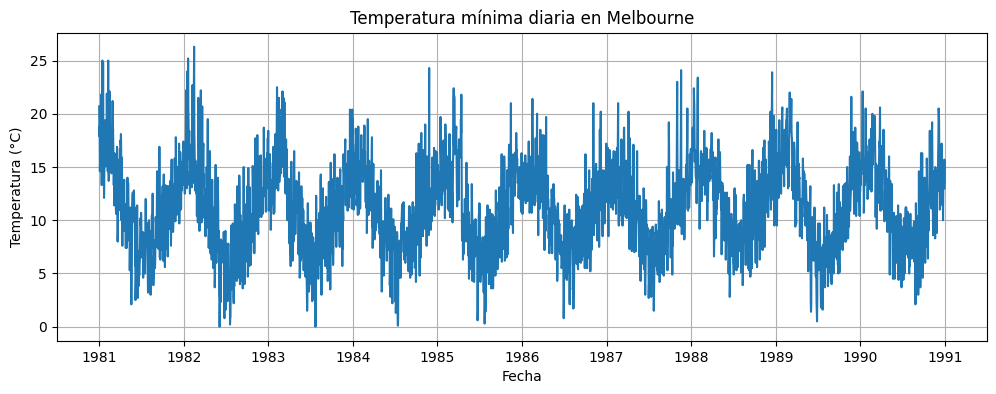

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0492 - val_loss: 0.0101
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113 - val_loss: 0.0098
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0097
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105 - val_loss: 0.0093
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - val_loss: 0.0092
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0090
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0106 - val_loss: 0.0089
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - val_loss: 0.0087
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - val_loss: 0.0084
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0094 - val_loss: 0.0081
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0101 - val_loss: 0.0078
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0097 - val_loss: 0.007

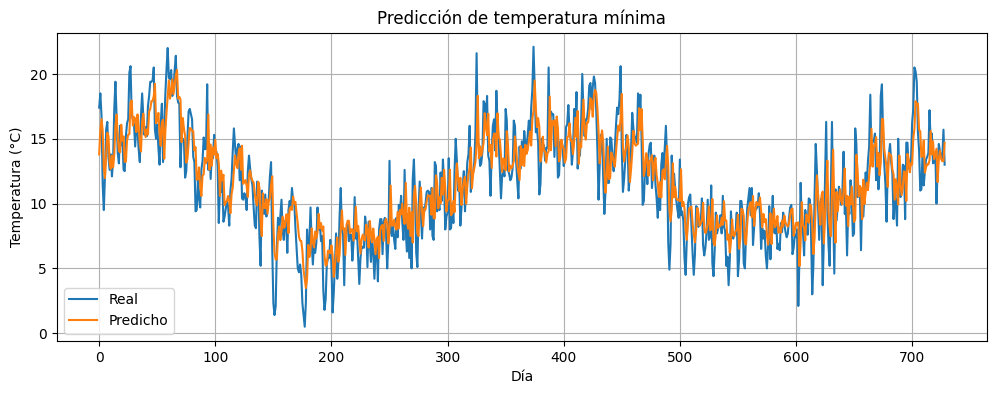

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Cargar la base de datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'])

plt.figure(figsize=(12, 4))
plt.plot(data['Date'], data['Temp'])
plt.title('Temperatura mínima diaria en Melbourne')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()


scaler = MinMaxScaler(feature_range=(0, 1))
temp_scaled = scaler.fit_transform(data['Temp'].values.reshape(-1, 1))

# Crear secuencias de tiempo (X: 7 días, Y: siguiente día)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(temp_scaled, seq_length)


split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Modelo LSTM
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

#  Compilar modelo (optimizador: Adam)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


loss = model.evaluate(X_test, y_test)
print(f'MSE en test: {loss:.4f}')

# Graficar predicciones
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 4))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Predicho')
plt.title('Predicción de temperatura mínima')
plt.xlabel('Día')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


##**Conclusión a partir de las gráficas**
**Gráfica de la serie original:**

- La gráfica de temperatura mínima diaria muestra variaciones estacionales claras, con ciclos anuales: inviernos fríos y veranos más cálidos.

- Esto sugiere que hay patrones recurrentes en los datos, lo que justifica el uso de una red LSTM para aprender estas dependencias temporales.

**Gráfica de predicciones vs valores reales:**

- Se observa que las predicciones del modelo (línea predicha) siguen la tendencia general de los valores reales.

- Aunque puede haber diferencias puntuales, el modelo logra capturar la estructura global de la serie temporal.

- Esto indica que el modelo entrenado tiene una capacidad razonable de generalización, es decir, aprendió patrones útiles de los datos históricos para predecir nuevos valores.

### **Justificación del uso de Redes Neuronales Recurrentes (RNN – LSTM)**

Las Redes Neuronales Recurrentes (RNN) son ideales para problemas donde el orden y la secuencia de los datos son importantes, como en series temporales. En este proyecto, el objetivo es predecir la temperatura mínima del día siguiente en base a los días anteriores. Dado que existe una dependencia temporal en los datos (la temperatura de hoy depende de los días anteriores), una red tradicional como una red neuronal densa no sería adecuada.

Se utilizó una variante de RNN llamada Long Short-Term Memory (LSTM) porque está diseñada específicamente para manejar dependencias a largo plazo y mitigar el problema del desvanecimiento del gradiente. Esto permite que el modelo recuerde patrones de temperatura de días anteriores con mayor efectividad.

 #### **Justificación del uso del optimizador Adam**
El optimizador Adam (Adaptive Moment Estimation) fue elegido por ser una técnica robusta y ampliamente utilizada en redes neuronales profundas. Combina las ventajas de otros dos optimizadores populares: AdaGrad y RMSProp, adaptando automáticamente la tasa de aprendizaje para cada parámetro.

Adam es especialmente útil en este proyecto porque:

- Es eficiente computacionalmente.

- Requiere poca memoria adicional.

- Es adecuado para problemas con muchos datos y ruidos, como pueden ser las series climáticas.

En conjunto, la arquitectura LSTM y el optimizador Adam permiten entrenar un modelo preciso, estable y con buena capacidad de generalización sobre los datos de temperatura.

